# ENTRAINEMENT DU MODEL SUR LE DATASET 28RGB : IMAGES 28x28 EN NIIVEAU DE GRIS

In [14]:
#cd "C:\Users\donfa\OneDrive\Desktop\PROJET MACHINE LEARNING\skin-cancer-prediction-bcc"

In [15]:
import pandas as pd
from rich.jupyter import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
# Charger le dataset
dataset_path = "data/processed/Meta_Data_Processed_28RGB.csv"
df = pd.read_csv(dataset_path)


print(f"Dimensions du dataset : {df.shape}")
df.head()

Dimensions du dataset : (10015, 2369)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,192,153,193,195,155,192,197,154,185,202,...,0,0,0,0,0,0,1,0,0,0
1,25,14,30,68,48,75,123,93,126,158,...,0,0,0,0,0,0,1,0,0,0
2,192,138,153,200,145,163,201,142,160,206,...,0,0,0,0,0,0,1,0,0,0
3,38,19,30,95,59,72,143,103,119,171,...,0,0,0,0,0,0,1,0,0,0
4,158,113,139,194,144,174,215,162,191,225,...,0,0,0,0,0,0,0,0,0,0


#### Le dataset contient 2369 colonnes de pixels (28x28) et 16 colonnes de métadonnées. , nous allons eliminer la colone label , car elle est redondante avec la colonne is_bcc

In [17]:
# Supprimer la colonne 'label'
df.drop('label', axis=1, inplace=True)

#### Leger resumé des données

In [18]:
# Informations sur le dataset
print("\nRésumé des données :")
(df.info())



Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2368 entries, pixel0000 to localization_upper extremity
dtypes: float64(1), int64(2367)
memory usage: 180.9 MB


#### Gestion des evenuelles valeurs manquantes

In [19]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Gestion des valeurs manquantes (imputation par la moyenne pour les colonnes numériques)
df_cleaned = df.fillna(df.mean(numeric_only=True))

# Confirmation des modifications
print("\nDataset après nettoyage :")
print(df_cleaned.head())
print(f"Dimensions après nettoyage : {df_cleaned.shape}")


Valeurs manquantes par colonne :
age    57
dtype: int64

Dataset après nettoyage :
   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  localization_face  \
0        197        154        185        202  ...                  0   
1        123         93        126        158  ...                  0   
2        201        142        160        206  ...                  0   
3        143        103        119        171  ...                  0   
4        215        162        191        225  ...                  0   

   localization_foot  localization_genital  locali

### Division des Données en Ensembles d’Entraînement et de Test

In [28]:
X = df_cleaned.drop(columns=['is_bcc'], errors='ignore')  # 'is_bcc' est la cible
y = df_cleaned['is_bcc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDimensions des ensembles d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Dimensions des ensembles de test : {X_test.shape}, {y_test.shape}")



Dimensions des ensembles d'entraînement : (8012, 2367), (8012,)
Dimensions des ensembles de test : (2003, 2367), (2003,)


### Standardisation des Caractéristiques
Pour de meilleurs résultats avec certains modèles, il est important de standardiser les données.

In [29]:
# Standardisation des données
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAperçu des données standardisées (entraînement) :")
pd.DataFrame(X_train_scaled, columns=X.columns).head()



Aperçu des données standardisées (entraînement) :


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.898039,0.601626,0.654902,0.909449,0.597561,0.661417,0.905882,0.581673,0.666667,0.905882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.623529,0.426829,0.560784,0.625984,0.406504,0.539370,0.619608,0.386454,0.513725,0.631373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.039216,0.020325,0.031373,0.220472,0.142276,0.177165,0.415686,0.294821,0.352941,0.517647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.588235,0.556911,0.517647,0.622047,0.605691,0.602362,0.647059,0.621514,0.639216,0.654902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.513725,0.483740,0.549020,0.535433,0.504065,0.551181,0.549020,0.509960,0.572549,0.564706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Modèle de régression logistique sur 28RGB

Exactitude (Accuracy) : 0.96
Score ROC-AUC : 0.94


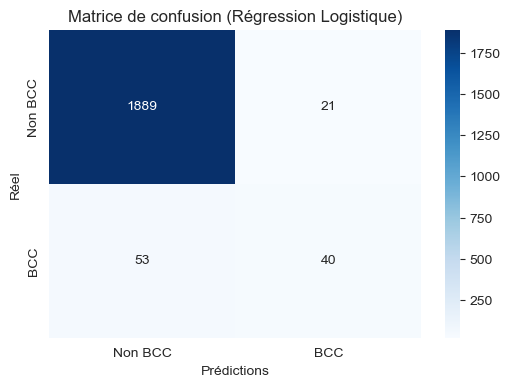

In [22]:

# Entraînement
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Prédictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"Exactitude (Accuracy) : {accuracy_logreg:.2f}")
print(f"Score ROC-AUC : {roc_auc_logreg:.2f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])
plt.title("Matrice de confusion (Régression Logistique)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/28RGB avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/28RGB'):
    os.makedirs('reports/images/entrainement/28RGB')
plt.savefig('reports/images/entrainement/28RGB/mat_conf_logreg_28RGB.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/28RGB
filename = 'models/model_logreg_28RGB.pkl'
pickle.dump(logreg, open(filename, 'wb'))




### On remarque que la regression logistique a une accuracy de 0.94 et un score roc-auc de 0.89 cependant on peut essayer d'autres algorithmes pour voir si on peut avoir de meilleurs resultats , car pour la regression logistique le nombre de faux negatifs est assez eleve , MAIS PLUS DE VRAIS POSITIFS SONT IDENTIFIES , LES CHOSES SEMBLENT DONC PLUS EQUILIBREES QUE POUR LE MODELE 28L ET 8RGB

### Modèle Random Forest sur 28RGB

Exactitude (Accuracy) : 0.96
Score ROC-AUC : 0.92


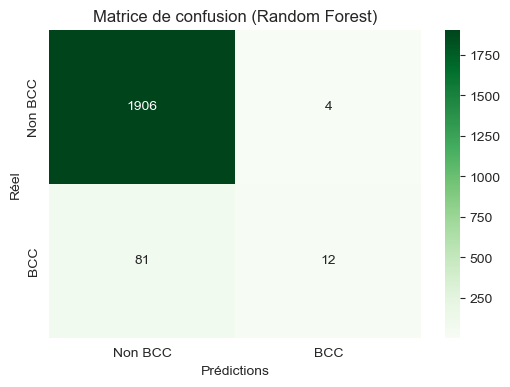

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Exactitude (Accuracy) : {accuracy_rf:.2f}")
print(f"Score ROC-AUC : {roc_auc_rf:.2f}")

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion (Random Forest)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/28RGB avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/28RGB'):
    os.makedirs('reports/images/entrainement/28RGB')
plt.savefig('reports/images/entrainement/28RGB/mat_conf_rf_28RGB.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/28RGB
filename = 'models/model_rf_28RGB.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele Random Forest a ENORMEMENT DE FAUX NEGATIFS , LA REGRESSION LOGISTIQUE SEMBLE FAIRE UN MEILLEUR TRAVAIL

### Arbres de Décision sur 28RGB

Exactitude (Accuracy) : 0.92
Score ROC-AUC : 0.66


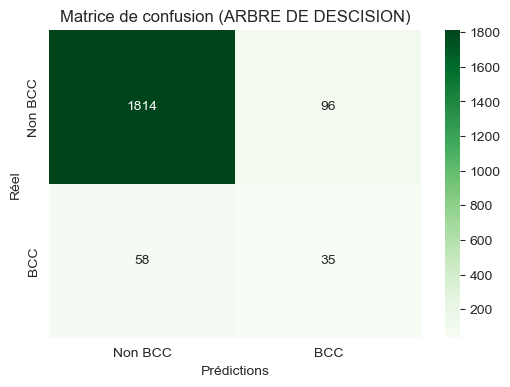

In [24]:
# Entraînement
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Prédictions
y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print(f"Exactitude (Accuracy) : {accuracy_dt:.2f}")
print(f"Score ROC-AUC : {roc_auc_dt:.2f}")

# Matrice de confusion
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion (ARBRE DE DESCISION)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/28RGB avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/28RGB'):
    os.makedirs('reports/images/entrainement/28RGB')
plt.savefig('reports/images/entrainement/28RGB/mat_conf_dt_28RGB.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/28RGB
filename = 'models/model_dt_28RGB.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele d'arbre de decision identifie plus de cas BCC que les autres et mais moins de faux negatifs , il sera sans doute meilleur avec un jeu de donnees plus detaille 

Nombre optimal de voisins (k) : 12


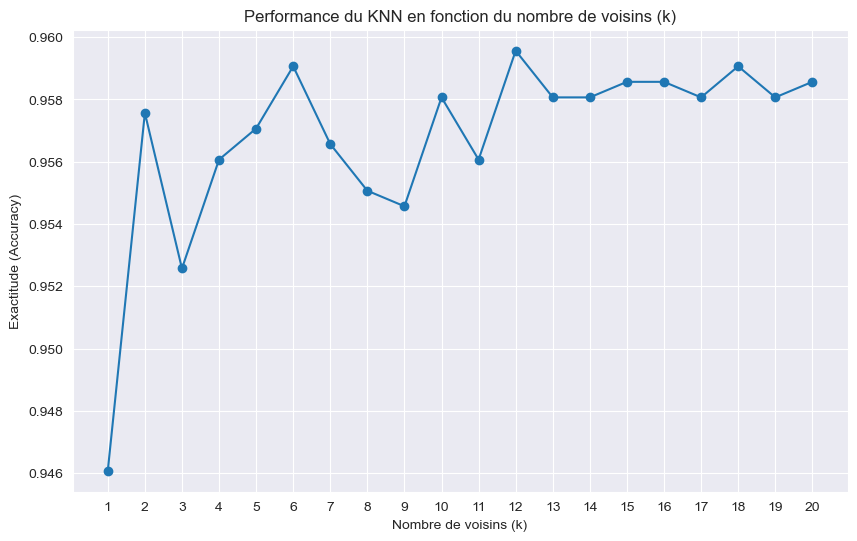

Exactitude (Accuracy) avec k optimal : 0.96
Score ROC-AUC avec k optimal : 0.84


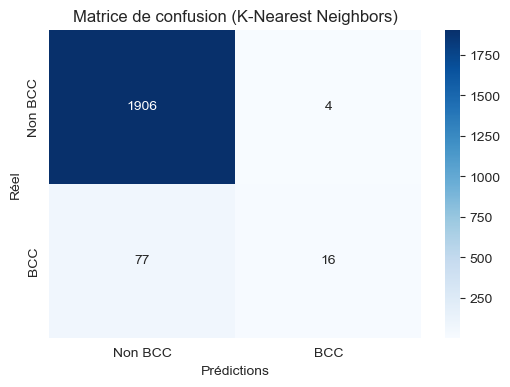

In [25]:
# Évaluation du nombre optimal de voisins (k)
k_values = range(1, 21)  # Tester de 1 à 20 voisins
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Trouver le k optimal
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Nombre optimal de voisins (k) : {optimal_k}")

# Affichage du graphique k vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Performance du KNN en fonction du nombre de voisins (k)')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Exactitude (Accuracy)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.close()

# Entraînement avec le k optimal
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Prédictions
y_pred_knn = knn_optimal.predict(X_test_scaled)
y_pred_proba_knn = knn_optimal.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"Exactitude (Accuracy) avec k optimal : {accuracy_knn:.2f}")
print(f"Score ROC-AUC avec k optimal : {roc_auc_knn:.2f}")

# Matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])
plt.title("Matrice de confusion (K-Nearest Neighbors)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")

# Sauvegarde de l'image
image_path = os.path.join('reports', 'images', 'entrainement', '28RGB', 'mat_conf_knn_28RGB.png')
os.makedirs(os.path.dirname(image_path), exist_ok=True)
plt.savefig(image_path)
plt.show()
plt.close()

# Sauvegarde du modèle
filename = 'models/model_knn_28RGB.pkl'
pickle.dump(knn_optimal, open(filename, 'wb'))


# RECAPITULATIF DES MODELES SUR LE DATASET 28RGB : IMAGES 8x8 EN RGB on constate une legere amelioration du modele

----
# ON CONSTATE UN MEILLEUR RESULTAT QU'AVEC UN ENTRAINEMENT SUR 28L , ET AU VUE DES RESULTATS EN TERMES DE VRAIS ET FAUX POSIFIS ET NEGATIFS , LA REGRESSION LOGISTIQUE SEMBLE FAIRE UN MEILLEUR TRAVAIL QUE LES AUTRES MODELES

------
# AVEC DONC UN DATASET BIEN PLUS DETAILLE , ON CONSTATE QUE LA REGRESSION LOGISTIQUE EST LE MODELE QUI DONNE LES MEILLEURS RESULTATS , AVEC UN SCORE ROC-AUC DE 0.89 ET UNE ACCURACY DE 0.94 ET UN NOMBRE DE VRAIS POSITIFS PLUS ELEVE QUE LES AUTRES MODELES

-----
# TENTONS UNE VALIDATION CROISEE POUR CONFIRMER CES RESULTATS AVEC LA REGRSSION LOGISTIQUE

## MAIS AVANT CELA , ESSAYONS DE REFAIRE UNE REGRESSION LOGISTIQUE EN DONNANT PLUS D'IMPORTANCES AUX COLONES DE METADONNESS

Exactitude (Accuracy) : 0.96
Score ROC-AUC : 0.94


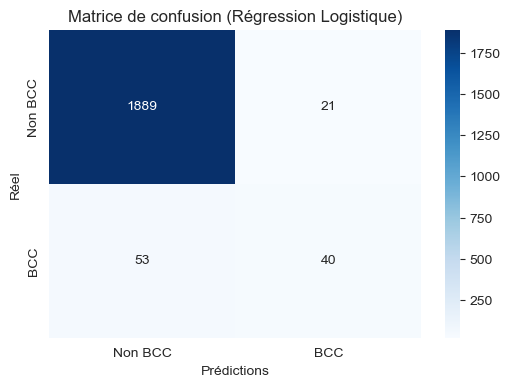

In [27]:
# faisons un petit traitement sur X_train et X_test pour donner plus d'importance aux colonnes de metadonnees ce sont les 15 derniere colones , et nous allons augmenter leurs valuers de 2
X_train.iloc[:,-15:] = X_train.iloc[:,-15:]+10
X_test.iloc[:,-15:] = X_test.iloc[:,-15:]+10 



# Entraînement
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Prédictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"Exactitude (Accuracy) : {accuracy_logreg:.2f}")
print(f"Score ROC-AUC : {roc_auc_logreg:.2f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])
plt.title("Matrice de confusion (Régression Logistique)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/28RGB avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/28RGB'):
    os.makedirs('reports/images/entrainement/28RGB')
plt.savefig('reports/images/entrainement/28RGB/mat_conf_logreg_28RGB.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/28RGB
filename = 'models/model_logreg_28RGB.pkl'
pickle.dump(logreg, open(filename, 'wb'))




## LES PERFORMANCE DE LA REGRESSION LOGISTIQUE N'ONT PAS CHANGE , NOUS ALLONS DONC FAIRE UNE VALIDATION CROISE , L'AUGMENTATION DE L'IMPORTANCE DES METADONNEES DEVANT LES PIXELS N'A PAS CHANGE LES RESULTATS


Dimensions des ensembles d'entraînement : (8012, 2367), (8012,)
Dimensions des ensembles de test : (2003, 2367), (2003,)

Aperçu des données standardisées (entraînement) :
   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0   0.898039   0.601626   0.654902   0.909449   0.597561   0.661417   
1   0.623529   0.426829   0.560784   0.625984   0.406504   0.539370   
2   0.039216   0.020325   0.031373   0.220472   0.142276   0.177165   
3   0.588235   0.556911   0.517647   0.622047   0.605691   0.602362   
4   0.513725   0.483740   0.549020   0.535433   0.504065   0.551181   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  localization_face  \
0   0.905882   0.581673   0.666667   0.905882  ...                0.0   
1   0.619608   0.386454   0.513725   0.631373  ...                0.0   
2   0.415686   0.294821   0.352941   0.517647  ...                0.0   
3   0.647059   0.621514   0.639216   0.654902  ...                0.0   
4   0.549020   0.509960   0.572549 

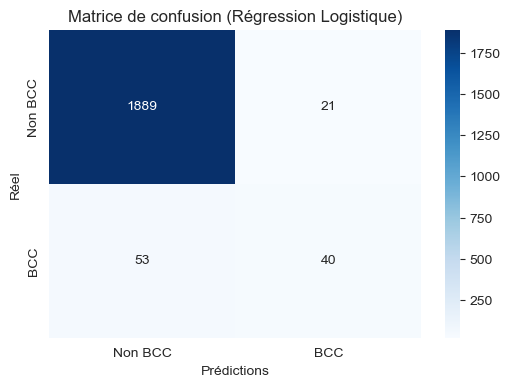

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import os
import pickle

# ... (Votre code de chargement et de prétraitement des données)

X = df_cleaned.drop(columns=['is_bcc'], errors='ignore')
y = df_cleaned['is_bcc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardisation des données
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Validation croisée
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)  # Définir le nombre de plis (k)
logreg = LogisticRegression(max_iter=10000)
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')

print(f"\nScores de validation croisée : {cv_scores}")
print(f"Exactitude moyenne en validation croisée : {np.mean(cv_scores):.2f}")
print(f"Écart-type des scores en validation croisée : {np.std(cv_scores):.2f}")

# Entraînement final sur l'ensemble d'entraînement complet
logreg.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques sur l'ensemble de test
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"\nExactitude (Accuracy) sur l'ensemble de test : {accuracy_logreg:.2f}")
print(f"Score ROC-AUC sur l'ensemble de test : {roc_auc_logreg:.2f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])
plt.title("Matrice de confusion (Régression Logistique)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")

# Sauvegarde de l'image
image_path = os.path.join('reports', 'images', 'entrainement', '28RGB', 'mat_conf_logreg_28RGB.png')
os.makedirs(os.path.dirname(image_path), exist_ok=True)
plt.savefig(image_path)
plt.show()
plt.close()

# Sauvegarde du modèle
filename = 'models/model_logreg_28RGB.pkl'
pickle.dump(logreg, open(filename, 'wb'))

# CONCLUSION SUR LA VALIDATION CROISEE ET DU MODEL LE PLUS PERFORMANT A RETENIR : 

Scores de validation croisée : [0.94946974 0.94884591 0.94694132 0.9556804  0.9525593 ]
Exactitude moyenne en validation croisée : 0.95
Écart-type des scores en validation croisée : 0.00

Exactitude (Accuracy) sur l'ensemble de test : 0.96
Score ROC-AUC sur l'ensemble de test : 0.94

## EN SOMME , LA REGRESSION LOGISTIQUE EST LE MODELE QUI DONNE LES MEILLEURS RESULTATS SUR LE DATASET 28RGB , AVEC UN SCORE ROC-AUC DE 0.94 ET UNE ACCURACY DE 0.96 , IL EST DONC LE MODELE A RETENIR POUR CE DATASET. DATASET QUI EST LE PLUS DETAILLE DES 3 DATASETS ET QUI DONNE LES MEILLEURS RESULTATS.